In [ ]:
# Constants
dynamic_viscosity = 0.00089          # Pa·s
membrane_resistance = 1e12           # m⁻¹
# flux = 4.17e-5                        # m/s (converted from 150 LMH)
flux = 0.00000794                       # m/s (converted from 28.6 LMH)

# Function to calculate TMP
def calculate_dp():
    dp = flux * dynamic_viscosity * membrane_resistance
    kpa = dp/1000
    return dp, kpa

# Output
print("The pressure drop across the membrane is:", calculate_dp(), "Pa")
print("The pressure drop across the membrane is:", calculate_dp()[1], "kPa")


The pressure drop across the membrane is: (7066.599999999999, 7.066599999999999) Pa
The pressure drop across the membrane is: 7.066599999999999 kPa


Backwash at 1200s: TMP before = 7.09 kPa
Backwash at 2400s: TMP before = 6.76 kPa
Backwash at 3600s: TMP before = 6.45 kPa
Backwash at 4800s: TMP before = 6.15 kPa
Backwash at 6000s: TMP before = 5.86 kPa
Backwash at 7200s: TMP before = 5.60 kPa
Backwash at 8400s: TMP before = 5.34 kPa
Backwash at 9600s: TMP before = 5.10 kPa


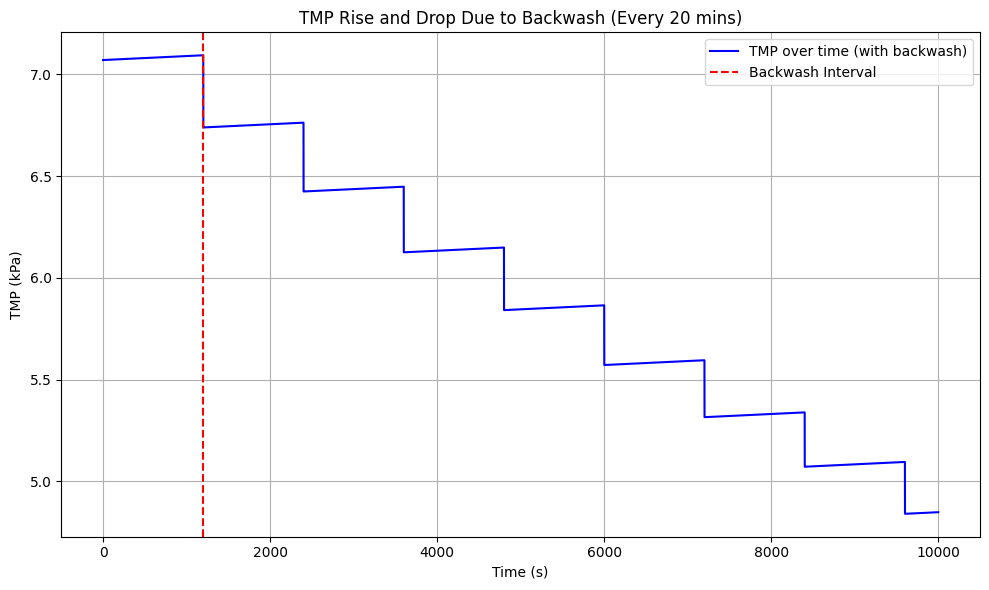

In [ ]:
### assumption = backwash recovers dpit to 95% of the original dpit
### backwash occurs every 20 min 



import matplotlib.pyplot as plt

# Assumed clean TMP from calculate_dp
initial_tmp = 7.07  # kPa from your previous result
gamma_h = 0.0705    # kPa/h
gamma_s = gamma_h / 3600  # kPa/s
dt = 1
steps = 10000
backwash_interval = 1200  # every 20 minutes = 1200 seconds
recovery_factor = 0.95    # backwash leaves TMP at 95% of current

# Initialize
time = []
pressure = []
tmp = initial_tmp  # current TMP
t = 0

# Simulation
for t in range(steps):
    time.append(t * dt)
    pressure.append(tmp)

    # Check if it's time for backwash
    if t % backwash_interval == 0 and t != 0:
        print(f"Backwash at {t}s: TMP before = {tmp:.2f} kPa")
        tmp = tmp - 0.8 * (tmp - clean_tmp) 

    # TMP increases over time due to fouling
    tmp += gamma_s * dt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, pressure, label="TMP over time (with backwash)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("TMP (kPa)")
plt.title("TMP Rise and Drop Due to Backwash (Every 20 mins)")
plt.axvline(x=1200, color='red', linestyle='--', label='Backwash Interval')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


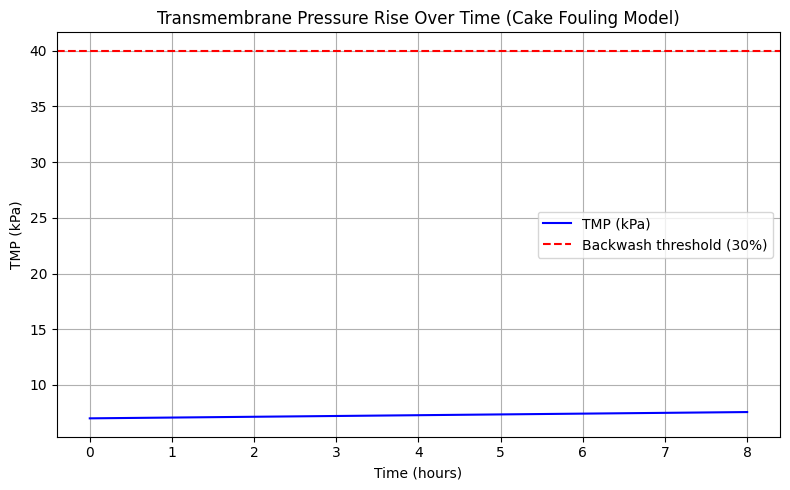